In [1]:
import os
from tensorflow import keras
import librosa
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
os.chdir("/home/safat/python_code/audio")
csv_file_name = 'UrbanSound8K/metadata/'
csv_file_path = os.path.join(os.getcwd(), csv_file_name)
print(csv_file_path)

/home/safat/python_code/audio/UrbanSound8K/metadata/


In [3]:
os.chdir(csv_file_path)
os.listdir()

['.DS_Store', 'UrbanSound8K.csv']

<h3>In the CSV Folder </h3>

In [4]:
df = pd.read_csv('UrbanSound8K.csv')
df.head(3)


,slice_file_name,fsID,start,end,salience,fold,classID,class_name
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing


In [5]:
print(df.class_name.value_counts())

engine_idling       1000
street_music        1000
jackhammer          1000
air_conditioner     1000
children_playing    1000
drilling            1000
dog_bark            1000
siren                929
car_horn             429
gun_shot             374
Name: class_name, dtype: int64


In [6]:
pwd

'/home/safat/python_code/audio/UrbanSound8K/metadata'

In [9]:
os.chdir("../audio")
os.getcwd()
os.listdir()

['.DS_Store',
 'fold2',
 'fold10',
 'fold1',
 'fold7',
 'fold4',
 'fold3',
 'fold6',
 'fold9',
 'fold5',
 'fold8']

<h3> Enter in the Frst Folder </h3>

In [10]:
frst_audio_folder = os.chdir('/home/safat/python_code/audio/UrbanSound8K/audio/fold1')
os.getcwd()

'/home/safat/python_code/audio/UrbanSound8K/audio/fold1'

In [11]:
import glob
x = len(glob.glob("*.wav"))
print(x)

873


In [12]:
os.listdir()[0]

'143651-2-0-39.wav'

In [13]:
import IPython.display as ipd
import librosa.display
ipd.Audio(os.listdir()[3])
#wave_file = open(os.listdir()[3],"rb")
#riff = wave_file.read(36)
#print(riff)

## We want to convert the Sound to Numpy Array

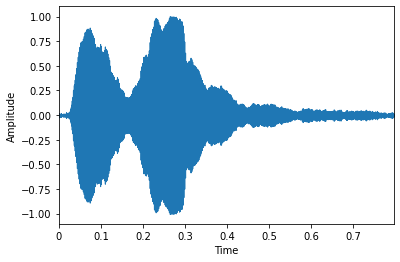

In [14]:
signal, sr = librosa.load(os.listdir()[3], sr = 22050)
librosa.display.waveplot(signal, sr=sr)
plt.ylabel('Amplitude')
plt.show()

In [15]:
ps = librosa.feature.melspectrogram(y=signal,sr =sr)

In [16]:
ps.shape

(128, 35)

/home/safat/.local/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/safat/.local/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


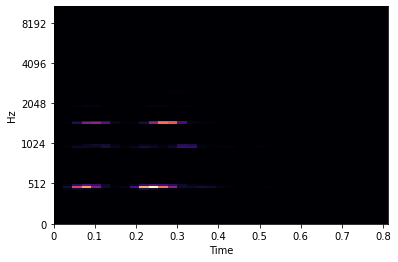

In [17]:
librosa.display.specshow(ps,y_axis='mel', x_axis='time')

## A new issue solved for finding the information of the wav file 

In [18]:
import struct

class WavFileHelper():
    
    def read_file_properties(self, filename):

        wave_file = open(filename,"rb")
        
        riff = wave_file.read(12)
        fmt = wave_file.read(36)
        
        num_channels_string = fmt[10:12]
        num_channels = struct.unpack('<H', num_channels_string)[0]

        sample_rate_string = fmt[12:16]
        sample_rate = struct.unpack("<I",sample_rate_string)[0]
        
        bit_depth_string = fmt[22:24]
        bit_depth = struct.unpack("<H",bit_depth_string)[0]

        return (num_channels, sample_rate, bit_depth)

In [19]:
wavfilehelper = WavFileHelper()
audiodata = []

for index, row in df.iterrows():
    file_name = os.path.join(os.path.abspath('/home/safat/python_code/audio/UrbanSound8K/audio/'),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    data = wavfilehelper.read_file_properties(file_name)
    audiodata.append(data)

# Convert into a Panda dataframe
audiodf = pd.DataFrame(audiodata, columns=['num_channels','sample_rate','bit_depth'])

In [20]:
#audiodf
#print(audiodf.num_chanaudionels.value_counts(normalize = True))
#print(audiodf.sample_rate.value_counts())
print(audiodf.bit_depth.value_counts(normalize=True))

16    0.659414
24    0.315277
32    0.019354
8     0.004924
4     0.001031
Name: bit_depth, dtype: float64


## Data pre-processing

In [21]:
def extract_features(file_name):

    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        mfccsscaled = np.mean(mfccs.T,axis=0)

    except Exception as e:
        print("Error encountered while parsing file: ", file)
        return None 

    return mfccsscaled

In [ ]:

# Load various imports 
import pandas as pd
import os
import librosa

# Set the path to the full UrbanSound dataset 
fulldatasetpath = '/home/safat/python_code/audio/UrbanSound8K/audio/'

metadata = pd.read_csv(fulldatasetpath + '../metadata/UrbanSound8K.csv')

features = []

# Iterate through each sound file and extract the features 
for index, row in metadata.iterrows():

    file_name = os.path.join(os.path.abspath(fulldatasetpath),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))

    class_label = row["class_name"]
     data= extract_features(file_name)

    features.append([data, class_label])

# Convert into a Panda dataframe 
featuresdf = pd.DataFrame(features, columns=['feature','class_label'])

print('Finished feature extraction from ', len(featuresdf), ' files')

## Load the env

In [1]:
import dill
dill.load_session('notebook_env.db')


In [2]:
featuresdf.to_hdf('features_from_UrbanSound.h5', key='df',mode='w')
os.listdir()

/home/safat/.local/lib/python3.8/site-packages/pandas/core/generic.py:2434: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_values] [items->Index(['feature', 'class_label'], dtype='object')]

  pytables.to_hdf(


['music_to_json_for_preparing_dataset.py',
 'cnn_model_after_training.h5',
 'audio_preprocessing_for_urbanSound.py',
 'features_from_UrbanSound.h5',
 'prediction_audio_with_cnn_based_trained_model.py',
 'cnn_genre_classification.py',
 'sample_of_urbansound',
 'solving_overfitting.py',
 'UrbanSound8K.tar.gz',
 '__pycache__',
 'notebook_env.db',
 'UrbanSound8K',
 'mlp_tf.py',
 'wavfilehelper.py',
 'mlp_forwardprop.py',
 'Untitled3.ipynb',
 'mlp_train_from_scratch.py',
 'sample_data1_10.json',
 'read_plot_audio.py',
 'Untitled2.ipynb',
 'Untitled.ipynb',
 'gunshot.mp3',
 '.ipynb_checkpoints',
 'features_from_urbanSound.csv',
 'Untitled1.ipynb',
 'sample_data_10.json',
 'folder_classifier.py',
 'audio_with_notebook_1.ipynb',
 'data_10.json',
 '.~lock.features_from_urbanSound.csv#',
 'audio_extract.py',
 'audio_processing_with_DL-master.zip',
 'audio_processing',
 'artificial_neuron.py',
 'gunshot.wav',
 'random.csv',
 'random_csv',
 'audio_processing_with_DL-master',
 'audio_deep_learning_

In [3]:
featuresdf.head()

,feature,class_label
0,"[-215.79301, 71.66612, -131.81377, -52.091328,...",dog_bark
1,"[-424.68677, 110.56227, -54.148235, 62.01074, ...",children_playing
2,"[-459.56467, 122.800354, -47.92471, 53.265694,...",children_playing
3,"[-414.55377, 102.896904, -36.66495, 54.18041, ...",children_playing
4,"[-447.397, 115.0954, -53.809113, 61.608585, 1....",children_playing


## Convert the data and labels for understable numerical data

In [4]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical  

In [5]:
inputs = np.array(featuresdf.feature.tolist())
targets = np.array(featuresdf.class_label.tolist())
le = LabelEncoder()
targets = to_categorical(le.fit_transform(targets))

In [7]:
print(len(targets))

8732


## Split the dataset

In [5]:
#split the dataset 
from sklearn.model_selection import train_test_split
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs,targets, test_size = 0.2)

In [7]:
print(inputs[0].shape)
print(inputs_train.shape)

(40,)
(6985, 40)



## Applying MLP first 

<h5> Build the network </h5>

In [7]:
#build the network
model = keras.Sequential()
#model.add(keras.layers.Flatten(input_shape=(40,)))
model.add(keras.layers.Dense(512,input_shape=(40,),activation="relu",kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(keras.layers.Dense(256,activation="relu",kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(keras.layers.Dense(64, activation="relu",kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(keras.layers.Dense(10, activation="softmax"))

<h5> Compile the network </h5>

In [8]:
#compile network
optimizer = keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(optimizer=optimizer,loss="categorical_crossentropy"
             ,metrics=["accuracy"])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               20992     
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 169,418
Trainable params: 169,418
Non-trainable params: 0
_________________________________________________________________


<h5>train network </h5>

In [11]:
#train network
history = model.fit(inputs_train,targets_train,validation_data=(
            inputs_test,targets_test),epochs=100,
            batch_size = 32)

Epoch 1/100
219/219 [==============================] - 1s 3ms/step - loss: 0.3544 - accuracy: 0.9758 - val_loss: 0.6978 - val_accuracy: 0.8918
Epoch 2/100
219/219 [==============================] - 1s 3ms/step - loss: 0.3368 - accuracy: 0.9825 - val_loss: 0.6488 - val_accuracy: 0.8970
Epoch 3/100
219/219 [==============================] - 1s 3ms/step - loss: 0.3259 - accuracy: 0.9853 - val_loss: 0.6785 - val_accuracy: 0.8861
Epoch 4/100
219/219 [==============================] - 1s 3ms/step - loss: 0.3332 - accuracy: 0.9811 - val_loss: 0.6503 - val_accuracy: 0.9084
Epoch 5/100
219/219 [==============================] - 1s 3ms/step - loss: 0.3295 - accuracy: 0.9831 - val_loss: 0.6338 - val_accuracy: 0.9073
Epoch 6/100
219/219 [==============================] - 1s 3ms/step - loss: 0.3295 - accuracy: 0.9834 - val_loss: 0.6130 - val_accuracy: 0.9090
Epoch 7/100
219/219 [==============================] - 1s 3ms/step - loss: 0.3209 - accuracy: 0.9864 - val_loss: 0.6591 - val_accuracy: 0.8941

Epoch 58/100
219/219 [==============================] - 1s 3ms/step - loss: 0.2482 - accuracy: 0.9947 - val_loss: 0.5702 - val_accuracy: 0.9170
Epoch 59/100
219/219 [==============================] - 1s 3ms/step - loss: 0.2714 - accuracy: 0.9861 - val_loss: 0.5964 - val_accuracy: 0.9124
Epoch 60/100
219/219 [==============================] - 1s 3ms/step - loss: 0.2536 - accuracy: 0.9931 - val_loss: 0.5792 - val_accuracy: 0.9176
Epoch 61/100
219/219 [==============================] - 1s 3ms/step - loss: 0.2736 - accuracy: 0.9853 - val_loss: 0.6027 - val_accuracy: 0.9061
Epoch 62/100
219/219 [==============================] - 1s 3ms/step - loss: 0.2494 - accuracy: 0.9930 - val_loss: 0.5684 - val_accuracy: 0.9187
Epoch 63/100
219/219 [==============================] - 1s 3ms/step - loss: 0.2475 - accuracy: 0.9928 - val_loss: 0.6011 - val_accuracy: 0.9061
Epoch 64/100
219/219 [==============================] - 1s 3ms/step - loss: 0.2460 - accuracy: 0.9940 - val_loss: 0.5530 - val_accuracy:

## Plot History

In [12]:
def plot_history(history):
	
	fig, axs = plt.subplots(2)
	
	#create accuracy subplots
	axs[0].plot(history.history["accuracy"], label="train accuracy")
	axs[0].plot(history.history["val_accuracy"], label="test accuracy")
	axs[0].set_ylabel("Accuracy")
	axs[0].legend(loc="lower right")
	axs[0].set_title("Accuracy eval")
	
	#create error subplots
	axs[1].plot(history.history["loss"], label="train error")
	axs[1].plot(history.history["val_loss"], label="test error")
	axs[1].set_ylabel("Error")
	axs[1].set_xlabel("Epoch")
	axs[1].legend(loc="upper right")
	axs[1].set_title("Error eval")

	plt.show()

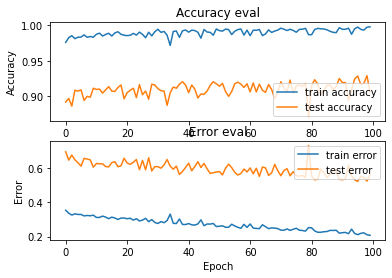

In [13]:
plot_history(history)

In [31]:
score = model.evaluate(inputs_train, targets_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(inputs_test, targets_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.9945597648620605
Testing Accuracy:  0.9055523872375488


In [38]:
import librosa 
import numpy as np 

def extract_feature(file_name):
   
    try:
        audio_data, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        mfccs = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=40)
        mfccsscaled = np.mean(mfccs.T,axis=0)
        
    except Exception as e:
        print("Error encountered while parsing file: ", file_name)
        return None, None

    return np.array([mfccsscaled])

In [46]:
filename = '/home/safat/python_code/audio/UrbanSound8K/audio/fold1/7061-6-0-0.wav' 
f = extract_feature(filename)
print(f)

[[-165.7632      17.871025   -53.848236    -1.3526943  -13.09826
    14.068279   -14.481862    19.177868     3.77617     27.795984
    14.577041    23.665552    -7.0893593    6.6916213   -7.773575
    14.43388      0.8530478   -1.0037954  -11.931069     4.6927385
    -1.4127803   -0.3435569   -3.7676578   10.192774    -1.6843723
    -3.7559657   -1.8369553    9.787353    -2.4084656    1.1147368
     1.8755261   -0.8904015   -2.4892223    7.1693664   -3.5928347
    -1.4767245    2.8920262   -2.0069292   -4.738015     2.7355986]]


## Predictions

In [39]:
def print_prediction(file_name):
    prediction_feature = extract_feature(file_name) 

    predicted_vector = model.predict_classes(prediction_feature)
    predicted_class = le.inverse_transform(predicted_vector) 
    print("The predicted class is:", predicted_class[0], '\n') 

    predicted_proba_vector = model.predict_proba(prediction_feature) 
    predicted_proba = predicted_proba_vector[0]
    for i in range(len(predicted_proba)): 
        category = le.inverse_transform(np.array([i]))
        print(category[0], "\t\t : ", format(predicted_proba[i], '.32f') )

In [49]:
filename = 'gunshot.wav' 
print_prediction(filename)

The predicted class is: gun_shot 

air_conditioner 		 :  0.00016299015260301530361175537109
car_horn 		 :  0.00000068230036731620202772319317
children_playing 		 :  0.00052970566321164369583129882812
dog_bark 		 :  0.21657580137252807617187500000000
drilling 		 :  0.00002211423998232930898666381836
engine_idling 		 :  0.00000001433474761114439388620667
gun_shot 		 :  0.78266507387161254882812500000000
jackhammer 		 :  0.00000003812274940173665527254343
siren 		 :  0.00000813715178082929924130439758
street_music 		 :  0.00003543399361660704016685485840


/home/safat/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/home/safat/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
